<a href="https://colab.research.google.com/github/Khhushhiiii/Scenario/blob/main/Scenario_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SCENARIO 2**: An online fashion retailer wants to develop a machine learning model that can classify
customer reviews into different sentiment categories. The model will take as input a
customer review and output a prediction of the review's sentiment, such as positive,
negative, or neutral. Develop a ML model for aforesaid classification with an example
Dataset.

**Project Introduction**

For the above scenario, I am using Amazon reviews fashion dataset which contains customer reviews and their sentiments labeled as positive:1, negative:-1 and neutral:0 in the overall column.
The process includes:
*   Cleaning the text data (removing punctuation, converting to lowercase, etc.).
*  Tokenizing the text (splitting it into words or subword units like tokens in BERT).
*   Encoding the labels (converting "positive," "negative," and "neutral" to numerical values).
* Splitting the data into training and testing sets.

The following model will process the emoji's used by customers to express their sentiments.


In [20]:
# install emoji library
!pip install emot

In [ ]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import string

# store models
import pickle
from sklearn.pipeline import Pipeline

# text preprocessing
import nltk
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import re
from emot.emo_unicode import EMOTICONS_EMO, UNICODE_EMOJI

# plots and metrics
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# feature extraction / vectorization
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# classifiers
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#Uploading the files of different time interval
file1 = "/content/02_06.csv"
file2 = "/content/07_12.csv"
file3 = "/content/13_17.csv"
file4 = "/content/18.csv"

In [47]:
def load_data(file):
  # read csv data and set columns
  df = pd.read_csv(file,usecols=['overall', 'reviewTime','reviewText'])

  # remove the duplicates if any
  df.duplicated('reviewText').sum()
  df.drop_duplicates(subset=['reviewText'],inplace=True)

  # remove NaN rows
  df.isnull().sum()
  df.dropna(how='any',axis=0,inplace=True)
  shape = df.shape
  counts = df.overall.value_counts()# labels count

  sns.countplot(df['overall']) # plot bar graph
  fig = plt.gcf() # get current figure
  fig.set_size_inches(5,5) # set the figure size
  plt.title('overall') # add title to the figure

  return df,shape,counts

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def load_data(file):
    # Read CSV data and set columns
    df = pd.read_csv(file, usecols=['overall', 'reviewTime', 'reviewText'])

    # Remove duplicates if any
    df.duplicated('reviewText').sum()
    df.drop_duplicates(subset=['reviewText'], inplace=True)

    # Remove NaN rows
    df.isnull().sum()
    df.dropna(how='any', axis=0, inplace=True)
    shape = df.shape
    counts = df['overall'].value_counts()  # Labels count

    # Plot a bar graph with all unique 'overall' values
    sns.countplot(data=df, x='overall')  # Use the 'overall' column from the DataFrame
    fig = plt.gcf()  # Get current figure
    fig.set_size_inches(5, 5)  # Set the figure size
    plt.title('overall')  # Add title to the figure

    return df, shape, counts

###Data Overview

In [65]:
df1.head(10)

,overall,reviewTime,reviewText
0,1.0,2006,This China Silk Black Balaclava is great for k...
1,1.0,2004,This item is very lightweight (as you'd expect...
2,1.0,2006,This item came in only 2 days and in perfect c...
3,1.0,2006,This ring was well worth the price. It has a l...
4,1.0,2006,"It was exactly as described. Beautiful ring, ..."
5,1.0,2005,This is a nice ring. It is simple and elegant...
6,1.0,2005,it is a beautiful ring. very shiny and classy....
7,1.0,2004,"When I first saw this offer last year, I could..."
8,1.0,2004,Socks seem like a strange kind of thing on whi...
9,1.0,2003,I ordered these socks for my Mother's birthday...


###Visualizing the data and the count of reviews for every time interval

(530, 3)
 1.0    386
-1.0     98
 0.0     46
Name: overall, dtype: int64


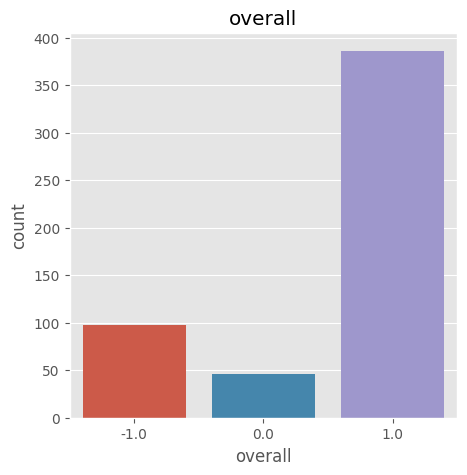

In [51]:
# load data for 1998 - 2006
df1,shape1,counts1 = load_data(file1)
print(shape1)
print(counts1)
df1.head()
plt.show()

(16800, 3)
 1.0    12574
-1.0     2657
 0.0     1569
Name: overall, dtype: int64


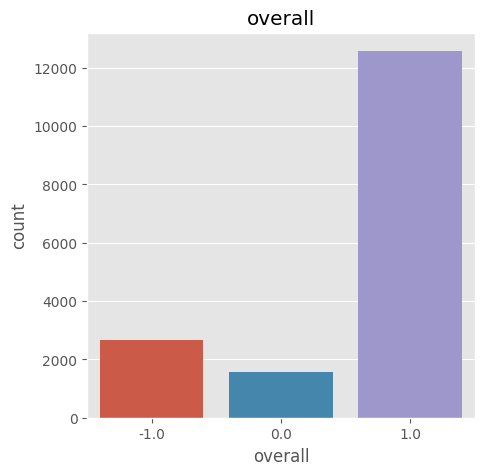

In [52]:
# load data for 2007 - 2012
df2,shape2,counts2 = load_data(file2)
print(shape2)
print(counts2)
df2.head()
plt.show()

(614812, 3)
 1.0    413534
-1.0    130175
 0.0     71103
Name: overall, dtype: int64


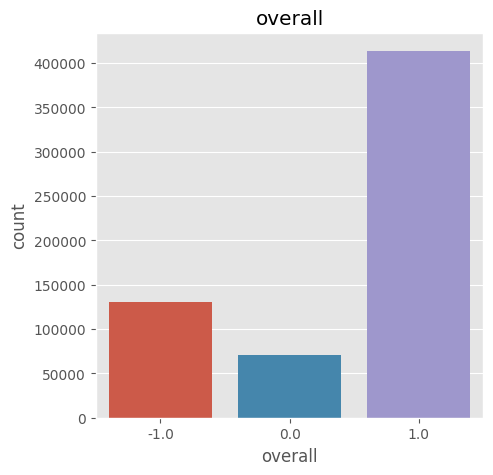

In [53]:
# load data for 2013 - 2017
df3,shape3,counts3 = load_data(file3)
print(shape3)
print(counts3)
df3.head()
plt.show()

(47246, 3)
 1.0    33622
-1.0     8865
 0.0     4759
Name: overall, dtype: int64


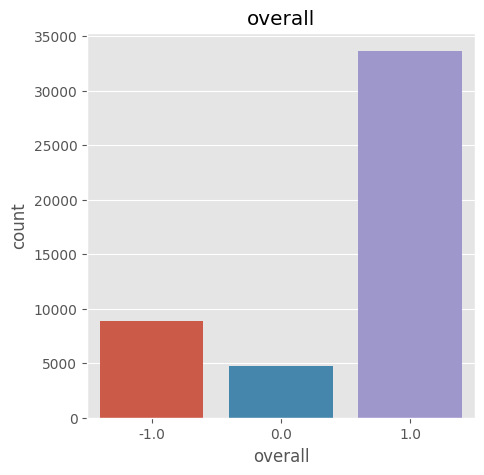

In [54]:
# load data for 2018
df4,shape4,counts4 = load_data(file4)
print(shape4)
print(counts4)
df4.head()
plt.show()

In [25]:
def split_balance(df,counts):
  # get data of each class
  groups = df.groupby(df.overall)
  pos = groups.get_group(1)
  neu = groups.get_group(0)
  neg = groups.get_group(-1)

  # shuffle the dataframe
  pos = pos.sample(frac=1.0)
  neu = neu.sample(frac=1.0)
  neg = neg.sample(frac=1.0)

  # compute the index to split 80% for train 20% for test
  posind = int(counts[1]*0.8)
  neuind = int(counts[0]*0.8)
  negind = int(counts[-1]*0.8)

  # split to get train for each class
  pos_train = pos.iloc[:posind,:]
  neu_train = neu.iloc[:neuind,:]
  neg_train = neg.iloc[:negind,:]

  # split to get test for each class
  pos_test = pos.iloc[posind:,:]
  neu_test = neu.iloc[neuind:,:]
  neg_test = neg.iloc[negind:,:]

  # combine train dataset
  df_train = pd.concat([pos_train, neu_train, neg_train],sort=False).sample(frac=1.0)
  df_train_label = df_train.overall

  # combine test dataset
  df_test = pd.concat([pos_test, neu_test, neg_test],sort=False).sample(frac=1.0)
  df_test_label = df_test.overall

  return df_train,df_train_label,df_test,df_test_label

In [ ]:
# split train and test data for 1998 - 2006
df1_train,df1_train_label,df1_test,df1_test_label = split_balance(df1,counts1)

# get train and test text
df1_train_data = df1_train.reviewText
df1_test_data = df1_test.reviewText

In [ ]:
# split train and test data for 2007 - 2012
df2_train,df2_train_label,df2_test,df2_test_label = split_balance(df2,counts2)

# get train and test text
df2_train_data = df2_train.reviewText
df2_test_data = df2_test.reviewText

In [ ]:
# split train and test data for 2013 - 2017
df3_train,df3_train_label,df3_test,df3_test_label = split_balance(df3,counts3)

# get train and test text
df3_train_data = df3_train.reviewText
df3_test_data = df3_test.reviewText

In [ ]:
# split train and test data for 2018
df4_train,df4_train_label,df4_test,df4_test_label = split_balance(df4,counts4)

# get train and test text
df4_train_data = df4_train.reviewText
df4_test_data = df4_test.reviewText

In [ ]:
# Defining my NLTK stop words and my user-defined stop words
emojis = {**UNICODE_EMOJI,**EMOTICONS_EMO} # full list of emojis unicodes

In [26]:
def processtext(txt):
  # convert tweet to lower case
  txt = txt.lower()
  # remove all html tag
  txt = re.sub("(<.*?>)", "", txt)
  # remove all urls
  txt = re.sub('https?:\/\/\S+','',txt)
  # remove @ references
  txt = re.sub('@[\w_]+','',txt)
  # remove # hashtags
  txt = re.sub('#\S+','',txt)
  # replace all emojis
  for emo in emojis.keys():
    txt = txt.replace(emo,"EMOJI "+emojis[emo])
  # remove all multiple white spaces
  txt = re.sub('[\s]+',' ',txt)
  # remove all punctuations and non-ascii
  txt = re.sub('[\.?!,;:\-\[\]\{\}\(\)\'\"/]','',txt)
  # remove whitespace
  txt = txt.strip()

  # tokenization with nltk
  data = word_tokenize(txt)
  # stemming with nltk
  porter = PorterStemmer()
  stem_data = [porter.stem(word) for word in data]
  return stem_data

In [ ]:
# 5min
# TFIDF, unigrams and trigrams
tf_vect1 = TfidfVectorizer(tokenizer=processtext, sublinear_tf=True, norm='l2', ngram_range=(1,3))
# fit on previous 2013 data
tf_vect1.fit_transform(df1.reviewText)

# transform testing and training datasets to vectors
df1_train_vect = tf_vect1.transform(df1_train_data)
df1_test_vect = tf_vect1.transform(df1_test_data)

# transform on 2018 test data
df4_test_vect = tf_vect1.transform(df4_test_data)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
# 14min
tf_vect2 = TfidfVectorizer(tokenizer=processtext, sublinear_tf=True, norm='l2', ngram_range=(1,3))
tf_vect2.fit_transform(df2.reviewText)
df2_train_vect = tf_vect2.transform(df2_train_data)
df2_test_vect = tf_vect2.transform(df2_test_data)

# transform on 2018 test data
df4_test_vect2 = tf_vect2.transform(df4_test_data)

In [ ]:
# 21min
tf_vect3 = TfidfVectorizer(tokenizer=processtext, sublinear_tf=True, norm='l2', ngram_range=(1,3))
tf_vect3.fit_transform(df3.reviewText)
df3_train_vect = tf_vect3.transform(df3_train_data)
df3_test_vect = tf_vect3.transform(df3_test_data)

# transform on 2018 test data
df4_test_vect3 = tf_vect3.transform(df4_test_data)

In [27]:
svc1 = LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
svc1.fit(df1_train_vect, df1_train_label)
ysvm_pred = svc1.predict(df1_test_vect)

print("Accuracy: {:.2f}%".format(accuracy_score(df1_test_label, ysvm_pred) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(df1_test_label, ysvm_pred, average='micro') * 100))

Accuracy: 72.22%

F1 Score: 72.22


In [28]:
# estimate on 2018 data
ysvm_pred_18 = svc1.predict(df4_test_vect)
print("Accuracy: {:.2f}%".format(accuracy_score(df4_test_label, ysvm_pred_18) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(df4_test_label, ysvm_pred_18, average='micro') * 100))

Accuracy: 71.63%

F1 Score: 71.63


In [29]:
lr1=LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
lr1.fit(df1_train_vect, df1_train_label)
ylog_pred = lr1.predict(df1_test_vect)

print("Accuracy: {:.2f}%".format(accuracy_score(df1_test_label, ylog_pred) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(df1_test_label, ylog_pred, average='micro') * 100))

Accuracy: 72.22%

F1 Score: 72.22


In [30]:
ylog_pred_18 = lr1.predict(df4_test_vect)

print("Accuracy: {:.2f}%".format(accuracy_score(df4_test_label, ylog_pred_18) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(df4_test_label, ylog_pred_18, average='micro') * 100))

Accuracy: 71.41%

F1 Score: 71.41


In [32]:
nb1 = MultinomialNB(alpha=0.1,fit_prior=True)

nb1.fit(df1_train_vect, df1_train_label)
ynb_pred = nb1.predict(df1_test_vect)

print("Accuracy: {:.2f}%".format(accuracy_score(df1_test_label, ynb_pred) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(df1_test_label, ynb_pred, average='micro') * 100))

Accuracy: 75.00%

F1 Score: 75.00


In [33]:
ynb_pred_18 = nb1.predict(df4_test_vect)

print("Accuracy: {:.2f}%".format(accuracy_score(df4_test_label, ynb_pred_18) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(df4_test_label, ynb_pred_18, average='micro') * 100))

Accuracy: 71.38%

F1 Score: 71.38


In [34]:
rf1= RandomForestClassifier(n_estimators=100,criterion='entropy',n_jobs=-1)

rf1.fit(df1_train_vect, df1_train_label)
yrf_pred = rf1.predict(df1_test_vect)

print("Accuracy: {:.2f}%".format(accuracy_score(df1_test_label, yrf_pred) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(df1_test_label, yrf_pred, average='micro') * 100))

Accuracy: 72.22%

F1 Score: 72.22


In [35]:
yrf_pred_18 = rf1.predict(df4_test_vect)

print("Accuracy: {:.2f}%".format(accuracy_score(df4_test_label, yrf_pred_18) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(df4_test_label, yrf_pred_18, average='micro') * 100))

Accuracy: 71.17%

F1 Score: 71.17


###As we have got highest accuracy with Multinomial Naive Bayes Classifier, we will predict the sentiments using that model.
###Below are the sample texts given to the model to predict the sentiments of the user

In [59]:
# Predicting the sentiment by giving sample text
sample_text = "I really liked this product. Good fabric and nice colour"

# Preprocess the sample text
sample_text_processed = processtext(sample_text)

# Transform the preprocessed sample text into a TF-IDF vector
sample_text_vect = tf_vect1.transform([" ".join(sample_text_processed)])

# Use the trained Naive Bayes classifier to predict the sentiment
sentiment_prediction = nb1.predict(sample_text_vect)

# Print the sentiment prediction
if sentiment_prediction == -1:
    print("Negative sentiment")
elif sentiment_prediction == 0:
    print("Neutral sentiment")
elif sentiment_prediction == 1:
    print("Positive sentiment")
else:
    print("Sentiment prediction error")


Positive sentiment


In [60]:
# Predicting the sentiment by giving sample text
sample_text = "Not worth it, wastage of money"

# Preprocess the sample text
sample_text_processed = processtext(sample_text)

# Transform the preprocessed sample text into a TF-IDF vector
sample_text_vect = tf_vect1.transform([" ".join(sample_text_processed)])

# Use the trained Naive Bayes classifier to predict the sentiment
sentiment_prediction = nb1.predict(sample_text_vect)

# Print the sentiment prediction
if sentiment_prediction == -1:
    print("Negative sentiment")
elif sentiment_prediction == 0:
    print("Neutral sentiment")
elif sentiment_prediction == 1:
    print("Positive sentiment")
else:
    print("Sentiment prediction error")


Negative sentiment
